<a href="https://colab.research.google.com/github/YossefEFM/CodeClause_MovieAnalysis/blob/main/MovieAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

# Reading data

In [2]:
Data = pd.read_csv("/content/drive/MyDrive/imdb_top_1000.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
# checking null values and remove it
print("\n Missing values : ")
print(Data.isna().sum())
Data.dropna(axis =0 , inplace=True)
print(Data.isna().sum())


 Missing values : 
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


# Visualization

In [ ]:
Data.hist(figsize=(14,14), xrot=45)
plt.show()

We find that the most rate that Movies take is 7.7.

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='IMDB_Rating', data = Data)

plt.xlabel('IMDB_Rating')

plt.ylabel('Count')
  
plt.show()

we take  first 10 rows of the data as a sample. 
We find that the most score that Movies take is 76.0 .

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Meta_score', data = Data, order=Data['Meta_score'].value_counts().index[0:10])

plt.xlabel('Meta_score')

plt.ylabel('Count')
  
plt.show()

we take  first 10 rows of the data as a sample. 
We find that the most year that produced Movies in it is 2014 . 

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Released_Year', data = Data, order=Data['Released_Year'].value_counts().index[0:10])

plt.xlabel('Released_Year')

plt.ylabel('Count')
  
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Certificate', data = Data)

plt.xlabel('Certificate')

plt.ylabel('Count')
  
plt.show()

we take  first 10 rows of the data as a sample. 
We find that the most catageroy watching is Drama .

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x='Genre', data = Data, order=Data['Genre'].value_counts().index[0:10])

plt.xlabel('Genre')

plt.ylabel('Count')
  
plt.show()


we take first 10 rows of the data as a sample. We find that the most character as Star1 is " Tom Hanks " by 12 Movies.

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='Star1', data = Data, order=Data['Star1'].value_counts().index[:10])

plt.xlabel('Star1')

plt.ylabel('Count')
  
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(), cmap='RdBu_r', annot=True)
plt.show()

we take  first 10% of the data as a sample between 
Genre and released date. 
We find that the rate watching is in 2015 all over the latest 6 years

In [ ]:
plt.figure(figsize=(20,10))
X = Data.sort_values('Released_Year',ascending=False).head(100)
plt.scatter(X['Released_Year'], X['Genre'].head(100),color='gold')
plt.xlabel("Released_Year")
plt.ylabel("Genre")
plt.show()

we take  first 10% of the data as a sample between 
IMDB_Rating and released date. 
We find that the rate 9.2 is the least rae that took all over the 75 years and the most rate is arround 8.4 & 8.6

In [ ]:
plt.figure(figsize = (20,5))
X = Data.sort_values('IMDB_Rating',ascending=False).head(100)
plt.scatter(X['IMDB_Rating'].head(100), X['Released_Year'].head(100),color='gold')
plt.xlabel("IMDB_Rating")
plt.ylabel("Released_Year")
plt.show()

We find that Category A is the most rated category


In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(Data['Certificate'], Data['IMDB_Rating'],color='#8b8b8b')
plt.xlabel("Certificate")
plt.ylabel("IMDB_Rating")
plt.show()

According to the correlation matrix "Certificate" affect in "IMDB_Rating" Although "Meta score" count decrease when "IMDB_Rating' Increased As these Movies get the highest score 

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter( Data['IMDB_Rating'] ,Data['Meta_score'],color='#8b8b8b')
plt.xlabel("IMDB_Rating")
plt.ylabel("Meta_score")
plt.show()

We take first 50 rows and sort them ascending o we find that " Edge of Tomorrow " serie has the most grows 

In [ ]:
plt.figure(figsize = (60,20))
X = Data.sort_values('Gross',ascending=True).head(50)
plt.scatter( X['Gross'].head(50),X['Series_Title'].head(50),color='gold')
plt.xlabel("Gross")
plt.ylabel("Series_Title")
plt.show()

If we take 10% of the data and sort tem by the rating we find that most of series take  rate arrounding 7.6 & 8.6 

In [ ]:
plt.figure(figsize = (60,20))
X = Data.sort_values('IMDB_Rating',ascending=False).head(100)
plt.scatter(X['IMDB_Rating'].head(100), X['Series_Title'].head(100),color='gold')
plt.xlabel("IMDB_Rating")
plt.ylabel("Series_Title")
plt.show()

# Preprocessing & Modeling

# Preprocessing

In [24]:
print(Data.corr())
data = Data.drop(columns ="Poster_Link", inplace = False)
data.drop(columns ="Overview", inplace = False)
data.drop(columns ="Director", inplace = True)
data.drop(columns = "Star2", inplace = True)
data.drop(columns ="Star3", inplace = True)
data.drop(columns ="Star4", inplace = True)

print(data)

             IMDB_Rating  Meta_score  No_of_Votes
IMDB_Rating     1.000000    0.268531     0.494979
Meta_score      0.268531    1.000000    -0.018507
No_of_Votes     0.494979   -0.018507     1.000000
                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944         NaN   97 min   
999              The 39 Steps          1935         

In [25]:
labelEncoder = LabelEncoder()
for items in data.columns:
   labelEncoder.fit(data[items])
   data[items] = labelEncoder.transform(data[items])

# Modeling

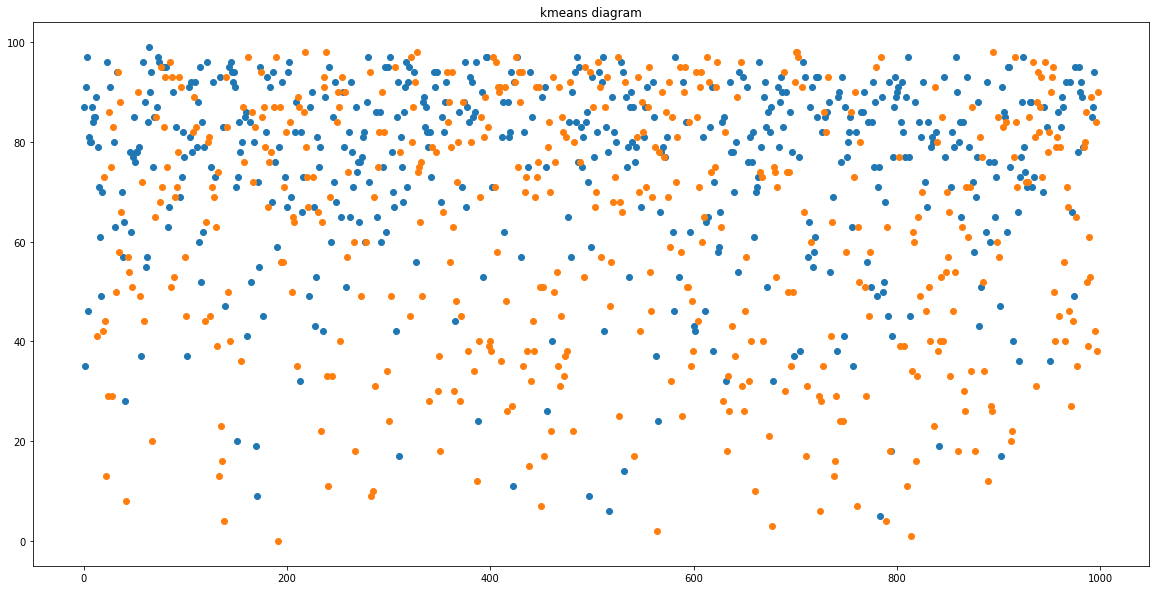

In [34]:
# Modeling by Kmeans with 2 clusters
kmeans = KMeans(n_clusters=2).fit_predict(data[:])
data = np.array(data)
labels = np.unique(kmeans)
plt.figure(figsize=(20,10))
for i in labels: #iterates to filter the data according to each unique class one iteration at a time 
#(filters and keeps the data points that belong to clutser label i)
    plt.scatter(data[kmeans == i,0],data[kmeans == i,1],label = i)
plt.title("kmeans diagram")
plt.show()

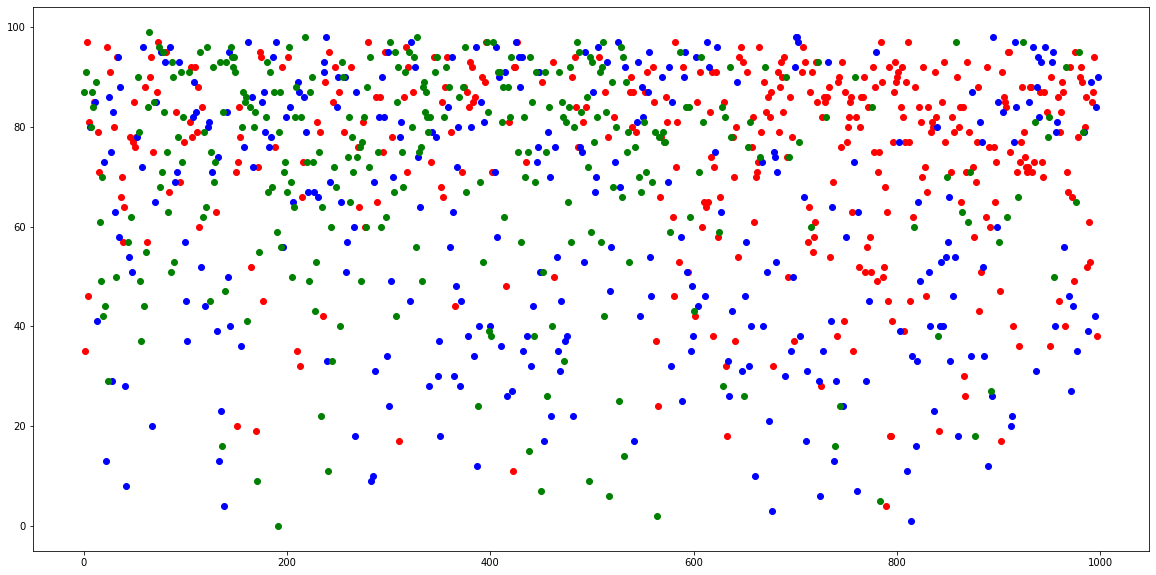

In [44]:
# Modeling using Agglomerative clustring
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#predicting the labels 
labels = agg_clustering.fit_predict(data)
#Plotting the results
plt.figure(figsize=(20,10))
plt.scatter(data[labels == 0 , 0] , data[labels == 0 , 1] , c = 'red')
plt.scatter(data[labels == 1 , 0] , data[labels == 1 , 1] , c = 'blue')
plt.scatter(data[labels == 2 , 0] , data[labels == 2 , 1] , c = 'green')
plt.show()


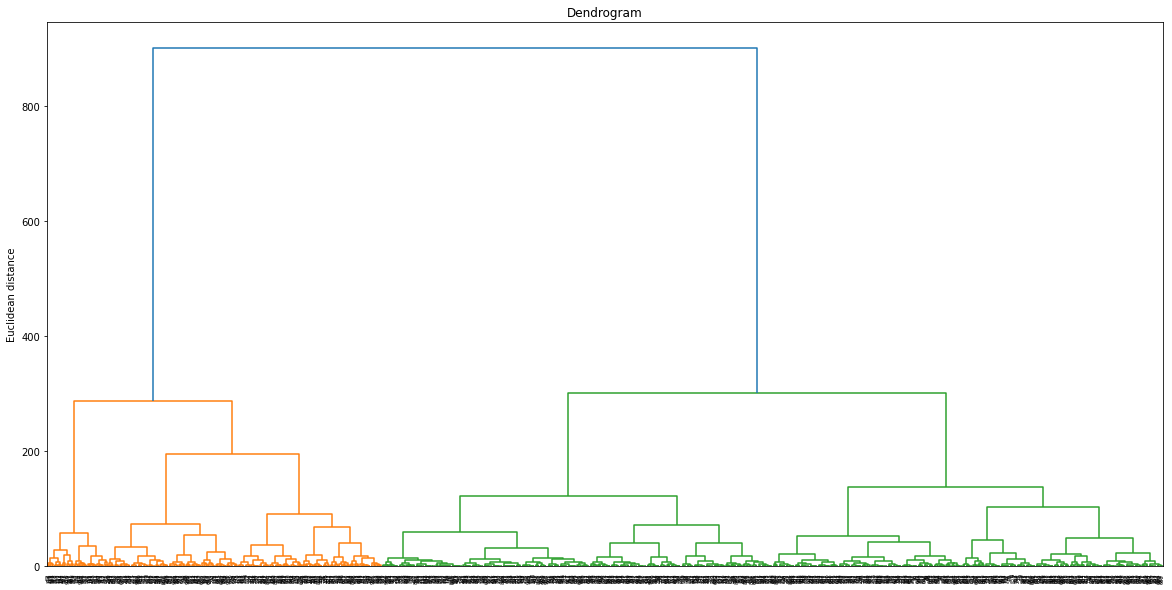

In [47]:
# Modeling using Dendogram
#Selecting certain features based on which clustering is done 
df = data[:,1:3] 
#Linkage Matrix
Z = linkage(df, method = 'ward')
plt.figure(figsize=(20,10))
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()